In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/content/USvideos.csv")

In [4]:
data.shape

(7269, 16)

In [5]:
data.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374.0,57527.0,2966.0,15954.0,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783.0,97185.0,6146.0,12703.0,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146033.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168.0,10172.0,666.0,2146.0,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731.0,132235.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [6]:
data = data.drop_duplicates()

In [7]:
data.describe()

,category_id,views,likes,dislikes,comment_count
count,7269.000000,7.268000e+03,7.268000e+03,7.268000e+03,7268.000000
mean,20.071674,1.348340e+06,4.905702e+04,3.210698e+03,6243.025454
std,7.404461,5.749472e+06,1.870425e+05,4.442048e+04,34112.295797
min,1.000000,6.870000e+02,0.000000e+00,0.000000e+00,0.000000
25%,17.000000,8.341325e+04,2.018000e+03,7.600000e+01,265.750000
50%,24.000000,3.014320e+05,8.852500e+03,2.955000e+02,1002.500000
75%,25.000000,9.469985e+05,2.864400e+04,1.034250e+03,3277.000000
max,29.000000,1.493761e+08,3.093544e+06,1.643059e+06,827755.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7269 entries, 0 to 7268
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                7269 non-null   object 
 1   trending_date           7269 non-null   object 
 2   title                   7269 non-null   object 
 3   channel_title           7269 non-null   object 
 4   category_id             7269 non-null   int64  
 5   publish_time            7269 non-null   object 
 6   tags                    7269 non-null   object 
 7   views                   7268 non-null   float64
 8   likes                   7268 non-null   float64
 9   dislikes                7268 non-null   float64
 10  comment_count           7268 non-null   float64
 11  thumbnail_link          7268 non-null   object 
 12  comments_disabled       7268 non-null   object 
 13  ratings_disabled        7268 non-null   object 
 14  video_error_or_removed  7268 non-null   

In [9]:
columns_to_remove = ['thumbnail_link','description']
data = data.drop(columns = columns_to_remove)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7269 entries, 0 to 7268
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                7269 non-null   object 
 1   trending_date           7269 non-null   object 
 2   title                   7269 non-null   object 
 3   channel_title           7269 non-null   object 
 4   category_id             7269 non-null   int64  
 5   publish_time            7269 non-null   object 
 6   tags                    7269 non-null   object 
 7   views                   7268 non-null   float64
 8   likes                   7268 non-null   float64
 9   dislikes                7268 non-null   float64
 10  comment_count           7268 non-null   float64
 11  comments_disabled       7268 non-null   object 
 12  ratings_disabled        7268 non-null   object 
 13  video_error_or_removed  7268 non-null   object 
dtypes: float64(4), int64(1), object(9)
memor

In [10]:
from datetime import datetime
import datetime

In [11]:
data['trending_date'] = data['trending_date'].apply(lambda x : datetime.datetime.strptime(x,'%y.%d.%m'))
data.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374.0,57527.0,2966.0,15954.0,False,False,False
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783.0,97185.0,6146.0,12703.0,False,False,False
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146033.0,5339.0,8181.0,False,False,False


In [12]:
data['publish_time'] = pd.to_datetime(data['publish_time'])
data['publish_month'] = data['publish_time'].dt.month
data['publish_day'] = data['publish_time'].dt.day
data['publish_hour'] = data['publish_time'].dt.hour
data.head(2)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,publish_month,publish_day,publish_hour
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374.0,57527.0,2966.0,15954.0,False,False,False,11,13,17
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783.0,97185.0,6146.0,12703.0,False,False,False,11,13,7


In [13]:
print(sorted(data['category_id'].unique()))
[1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 43]

[1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29]


[1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 43]

In [14]:
data['category_name'] = np.nan
data.loc[(data['category_id'] == 1), 'category_name'] = 'Film and Animation'
data.loc[(data['category_id'] == 2), 'category_name'] = 'Autos and Vehicles'
data.loc[(data['category_id'] == 10), 'category_name'] = 'Music'
data.loc[(data["category_id"] == 15), "category_name"] = 'Pets and Animals'
data.loc[(data ["category_id"] == 17 ), "category_name"] = 'Sports'
data.loc[(data["category_id"] == 19), "category_name"] = 'Travel and Events'
data.loc[(data["category_id"] == 20 ), "category_name"] = 'Gaming'
data.loc[(data["category_id"] == 22 ), "category_name"] = 'People and Blogs'
data.loc[(data["category_id"]== 23), "category_name"] = 'Comedy'
data.loc[(data["category_id"]== 24), "category_name"] = 'Entertainment'
data.loc[(data["category_id"] == 25), "category_name"] = 'News and Politics'
data.loc[(data["category_id"] == 26), "category_name"] = 'How to and Style'
data.loc[(data["category_id"]== 27), "category_name"] = 'Education'
data.loc[(data["category_id"] == 28), "category_name"] = 'Science and Technology'
data.loc[(data["category_id"] == 29), "category_name"] = 'Non Profits and Activism'
data.loc[(data["category_id"] == 30), "category_name"] = 'Movies'
data.loc[(data["category_id"] == 43), "category_name"] = 'Shows'

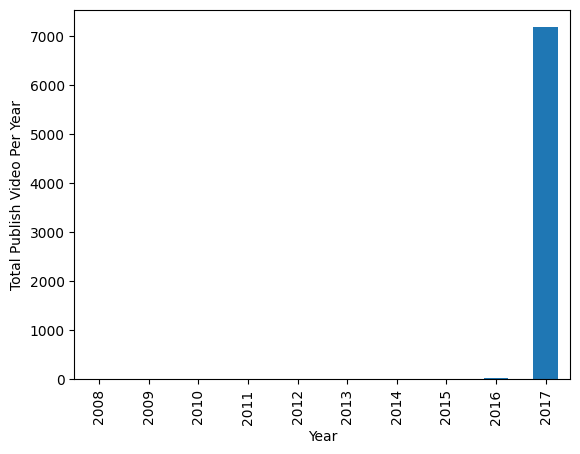

In [15]:
data['year'] = data['publish_time'].dt.year
yearly_counts = data.groupby('year')['video_id'].count()
yearly_counts.plot(kind = 'bar', xlabel = 'Year', ylabel = 'Total Publish Video Per Year')
plt.show()

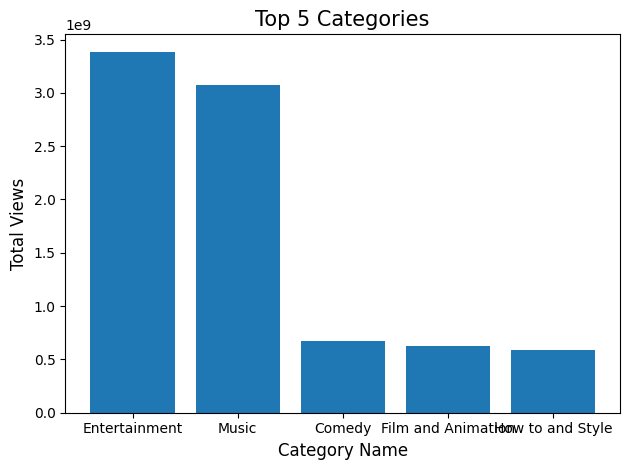

In [16]:
category_views = data.groupby('category_name')['views'].sum().reset_index()
top_categories = category_views.sort_values(by='views', ascending = False).head(5)
plt.bar(top_categories['category_name'], top_categories['views'])
plt.xlabel('Category Name', fontsize = 12)
plt.ylabel('Total Views', fontsize = 12)
plt.title('Top 5 Categories', fontsize = 15)
plt.tight_layout()
plt.show()


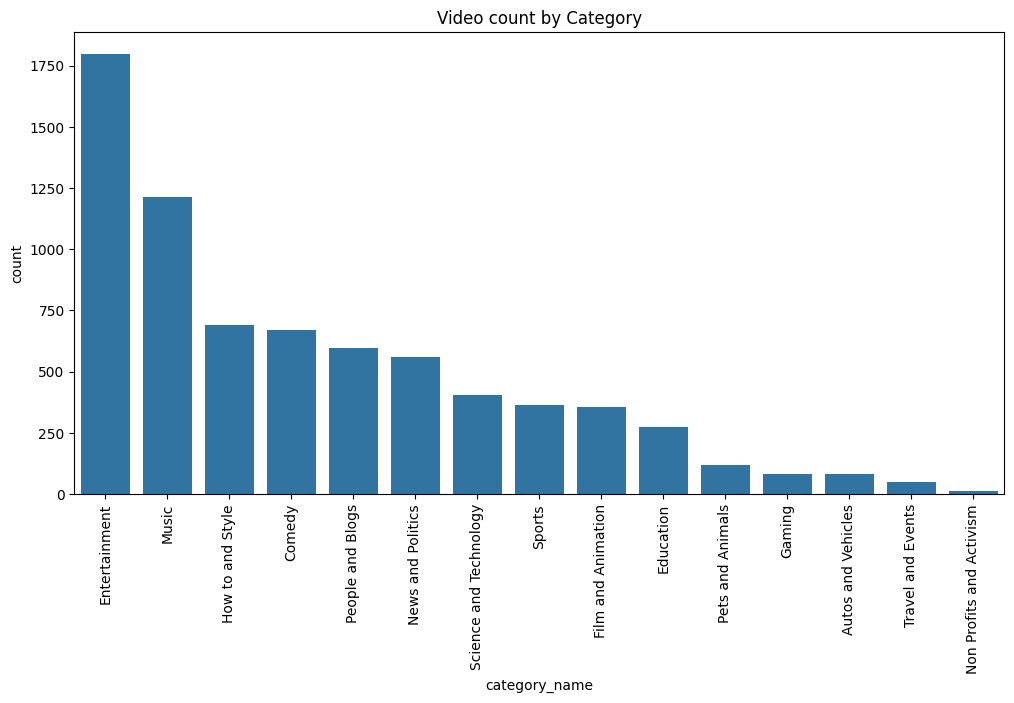

In [17]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'category_name', data=data, order=data['category_name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Video count by Category')
plt.show()

<ipython-input-18-b029707e577c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= videos_per_hour.index, y = videos_per_hour.values, palette = 'rocket')


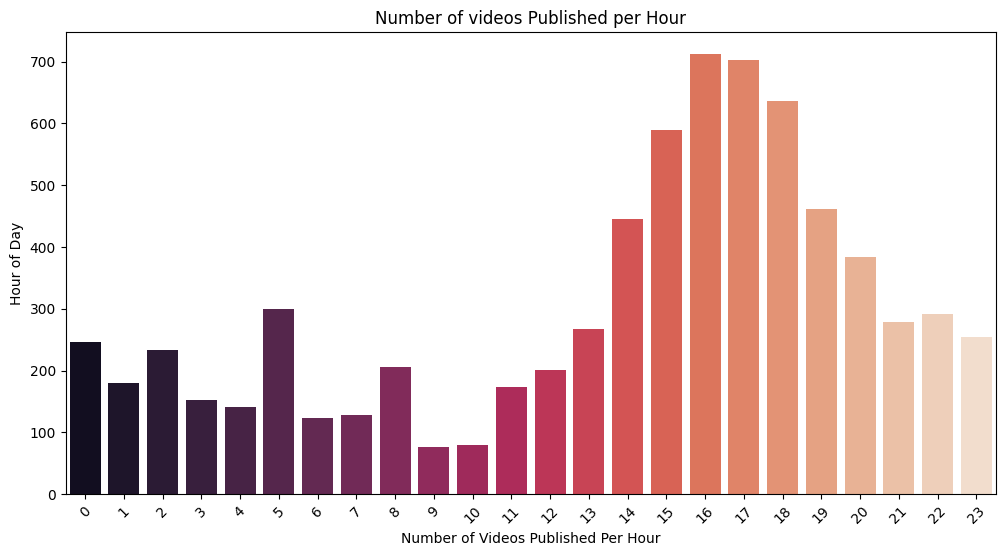

In [18]:
videos_per_hour = data['publish_hour'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.barplot(x= videos_per_hour.index, y = videos_per_hour.values, palette = 'rocket')
plt.title('Number of videos Published per Hour')
plt.xlabel('Number of Videos Published Per Hour')
plt.ylabel('Hour of Day')
plt.xticks(rotation = 45)
plt.show()

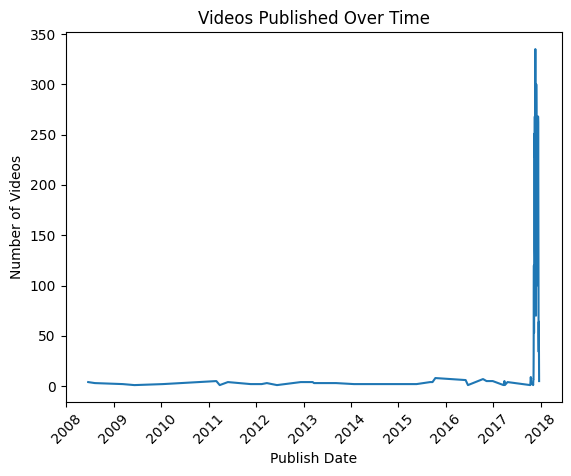

In [19]:
data['publish_time'] = pd.to_datetime(data['publish_time'])
data['publish_date'] = data['publish_time'].dt.date
video_count_by_date = data.groupby('publish_date').size()
sns.lineplot(data = video_count_by_date)
plt.title("Videos Published Over Time")
plt.xlabel('Publish Date')
plt.ylabel('Number of Videos')
plt.xticks(rotation = 45)
plt.show()

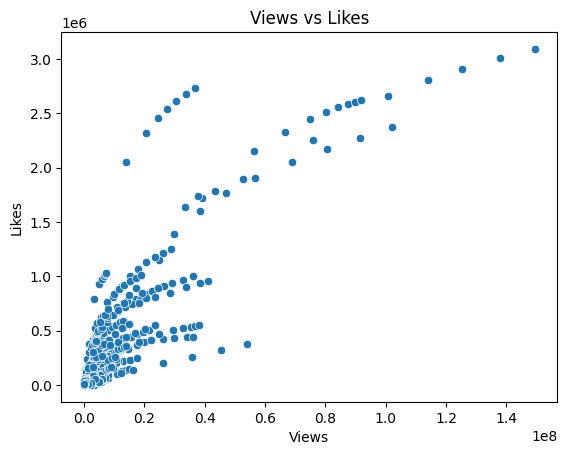

In [20]:
sns.scatterplot(data = data, x = 'views', y = 'likes')
plt.title('Views vs Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()

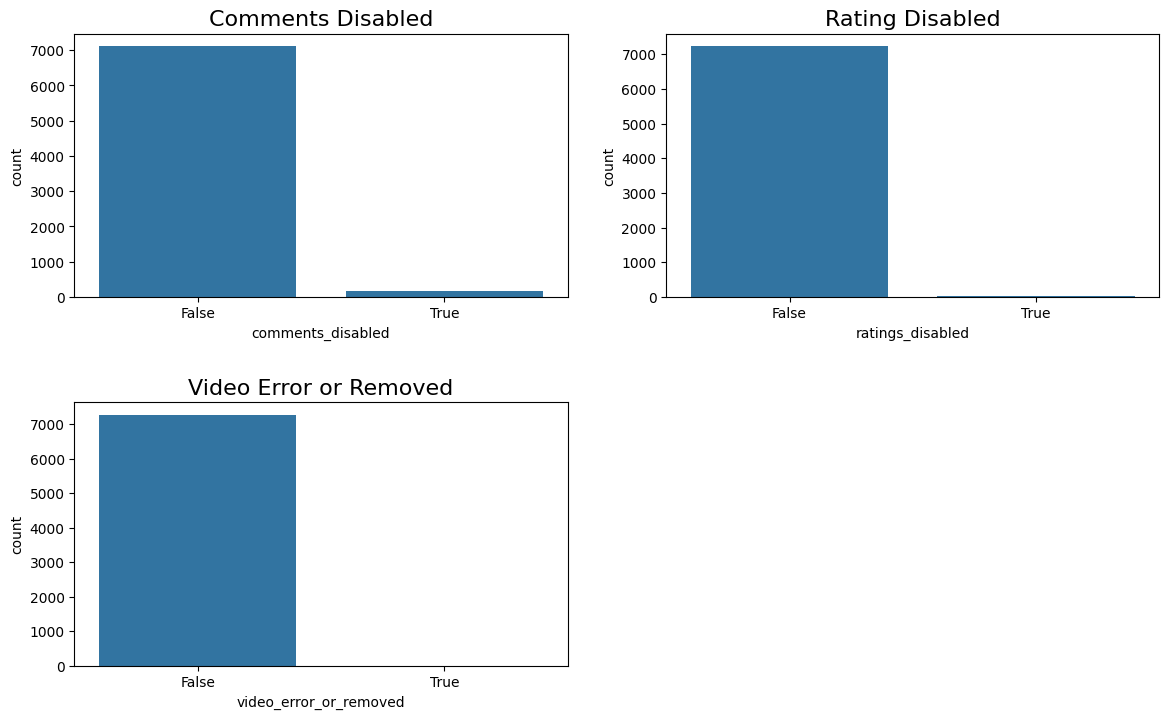

In [21]:
plt.figure(figsize = (14,8))
plt.subplots_adjust(wspace = 0.2,hspace = 0.4, top = 0.9)
plt.subplot(2,2,1)
g = sns.countplot(x ='comments_disabled', data = data)
g.set_title("Comments Disabled",fontsize= 16)
plt.subplot(2,2,2)
g1 = sns.countplot(x = 'ratings_disabled', data = data)
g1.set_title("Rating Disabled",fontsize = 16)
plt.subplot(2,2,3)
g2 = sns.countplot(x = 'video_error_or_removed',data = data)
g2.set_title("Video Error or Removed",fontsize = 16)
plt.show()